### 1. 관심영역(ROI)
- 연산할 데이터의 양을 줄이고 수행 시간을 단축시켜줌
- 데이터의 양이 줄어들면 그 형태도 단순해지므로 적용해야 알고리즘도 단순해짐
- 이미지 연산은 항상 좌표를 기반으로 해야되는데, 그 영역이 클 때보다 작을 때 죄표 구하기 쉬움

##### 관심영역 지정 및 복사

In [1]:
import cv2
import numpy as np

img = cv2.imread('./insightbook.opencv_project_python-master/img/sunset.jpg')
# roi 좌표
# 태양영역의 시작 좌표 x:320, y:150, 영역의 크기 50
x=320
y=150
w=50
h=50
roi = img[y:y+h,x:x+w]

print(roi.shape)
cv2.rectangle(roi,(0,0),(h-1,w-1),(0,255,0))  # roi에 사각형 그리기(색 지정-초록)
cv2.imshow('img',img)

cv2.waitKey(0)
cv2.destroyAllWindows()

(50, 50, 3)


In [2]:
# 관심 영역 복제 및 새로운 창 띄우기
import cv2
import numpy as np

img = cv2.imread('./insightbook.opencv_project_python-master/img/sunset.jpg')
# roi 좌표
x=320
y=150
w=50
h=50
roi = img[y:y+h,x:x+w]
img2 = roi.copy()   # 복사본 만들기
img[y:y+h,x+w:x+w+w] = roi # 새로운 좌표에 roi 추가 : 태양 2개 만들기

cv2.rectangle(img,(x,y),(x+w+w,y+h),(0,255,0)) # 2개의 태양 영역에 사각형 표기

cv2.imshow('img',img)
cv2.imshow('roi',img2) # roi만 따로 출력

cv2.waitKey(0)
cv2.destroyAllWindows()
# 복사본을 만들지 않으면 새 창에 띄운 태양 그림에도 초록 사각형이 그려지게 됨

##### 마우스로 관심영역 직접 지정

In [3]:
import cv2
import numpy as np

isDragging = False
x0,y0,w,h = -1,-1,-1,-1
blue, red = (255,0,0),(0,0,255)

def onMouse(event,x,y,flags,param):
    global isDragging, x0,y0,img
    if event == cv2.EVENT_LBUTTONDOWN:
        isDragging = True
        x0 = x
        y0 = y
    elif event == cv2.EVENT_MOUSEMOVE:
        if isDragging:
            img_draw = img.copy()
            cv2.rectangle(img_draw,(x0,y0),(x,y),blue,2)
            cv2.imshow('img',img_draw)
    elif event == cv2.EVENT_LBUTTONUP:
        if isDragging:
            isDragging = False
            w = x - x0
            h = y - y0
            print("x:%d,y:%d,w:%d,h:%d"%(x0,y0,w,h))
            if w > 0 and h > 0:
                img_draw = img.copy()
                cv2.rectangle(img_draw,(x0,y0),(x,y),red,2)
                cv2.imshow('img',img_draw)
                roi = img[y0:y0+h,x0:x0+w]
                cv2.imshow('cropped',roi)
                cv2.moveWindow('cropped',0,0)
                cv2.imwrite('./cropped.jpg',roi)
                print("cropped")
            else:
                cv2.imshow('img',img)
                print("좌측 상단에서 우측 하단으로 드래그하세요")

img = cv2.imread('./insightbook.opencv_project_python-master/img/sunset.jpg')
cv2.imshow('img',img)
cv2.setMouseCallback('img',onMouse)
cv2.waitKey()
cv2.destroyAllWindows()

x:288,y:123,w:124,h:108
cropped
x:298,y:111,w:100,h:116
cropped
x:400,y:252,w:0,h:0
좌측 상단에서 우측 하단으로 드래그하세요
x:413,y:239,w:0,h:0
좌측 상단에서 우측 하단으로 드래그하세요
x:252,y:120,w:174,h:124
cropped
x:481,y:110,w:0,h:0
좌측 상단에서 우측 하단으로 드래그하세요


### 캐스케이드 분류기(Cascade classifier)
- 새발자가 머신러닝 학습 알고리즘을 직접 사용하지 않고도 객체를 검출 할 수 있도록 OpenCV가 제공하는 대표적인 상위 레벨 API
- 트리 기반 부스트된 거절 캐스케이드 개념을 기초로 하며 얼굴 인식을 목적으로 했다가 그 이후 대부분의 물체 인식이 가능해짐
#### Face Detector and Recognizer
https://github.com/opencv/opencv/blob/4.x/data/haarcascades/haarcascade_frontalface_default.xml

##### 하르 캐스케이드 얼굴 검출

사진에서 얼굴과 눈을 검출하는 예제

In [1]:
import numpy as np
import cv2
# 얼굴 검출을 위한 캐스케이드 분류기
face_cascade = cv2.CascadeClassifier('./insightbook.opencv_project_python-master/09.ml/data/haarcascade_frontalface_default.xml')
# 눈 검출을 위한 캐스케이드 분류기 생성
eye_cascade = cv2.CascadeClassifier('./insightbook.opencv_project_python-master/09.ml/data/haarcascade_eye.xml')

img = cv2.imread('./insightbook.opencv_project_python-master/img/children.jpg')
# 검출할 이미지를 그레이 스케일로 변환
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# 얼굴 검출
faces = face_cascade.detectMultiScale(gray)

for (x,y,w,h) in faces:
    # 검출된 얼굴에 사각형 표시
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # 얼굴 영역을 roi로 설정
    roi = gray[y:y+h,x:x+w]
    # roi에서 눈 검출
    eyes = eye_cascade.detectMultiScale(roi)
    # 검출된 눈에 사각형 표시
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(img[y:y+h,x:x+w],(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

        
cv2.imshow('img',img)
cv2.waitKey(0)
cv2.destroyAllWindows()

카메라에서 얼굴과 눈 검출

In [6]:
import cv2

# 얼굴 검출을 위한 캐스케이드 분류기
face_cascade = cv2.CascadeClassifier('./insightbook.opencv_project_python-master/09.ml/data/haarcascade_frontalface_default.xml')
# 눈 검출을 위한 캐스케이드 분류기 생성
eye_cascade = cv2.CascadeClassifier('./insightbook.opencv_project_python-master/09.ml/data/haarcascade_eye.xml')

# 카메라 캡쳐 활성화
cam = cv2.VideoCapture(0)

while True:
    ret,img = cam.read()
    if not ret:
        print('no frame')
        break
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        cv2.rectangle(img, (x,y),(x+w,y+h),(0,255,0),2)
        roi = gray[y:y+h,x:x+w]
        eyes = eye_cascade.detectMultiScale(roi)
        for (ex,ey,ew,eh) in eyes:
            cv2.rectangle(img[y:y+h,x:x+w],(ex,ey),(ex+ew,ey+eh),(255,0,0),2)
    cv2.imshow('facedetect',img)
    
    if 0xFF & cv2.waitKey(5) == 27:
        break
cv2.destroyAllWindows()

### 2. 컬러 스페이스
각 바이트마다 어떤 색상 표현의 역할을 맡을지 결정하는 시스템
#### RGB,BGR,RGBA
- 빛의 3원소인 빨강, 초록, 파랑 세 가지 색의 빛을 섞어서 원하는 색을 표현
- 각 색상은 0~255 범위로 표현하고 값이 커질수록 해당 빛이 밝아지는 원리
- 세 가지 색상을 표현하므로 RGB 이미지는 3차원 배열로
- BGR : openCV에서는 RGB 값을 반대로 사용함

In [2]:
import cv2
import numpy as np

img = cv2.imread('./insightbook.opencv_project_python-master/img/opencv_logo.png')
bgr = cv2.imread('./insightbook.opencv_project_python-master/img/opencv_logo.png',cv2.IMREAD_COLOR)

bgra = cv2.imread('./insightbook.opencv_project_python-master/img/opencv_logo.png',cv2.IMREAD_UNCHANGED)

print("default:",img.shape,"color:",bgr.shape,"unchanged:",bgra.shape)

cv2.imshow('bgr',bgr)
cv2.imshow('bgra',bgra)
cv2.imshow('alpha',bgra[:,:,3])
cv2.waitKey(0)
cv2.destroyAllWindows()

default: (120, 98, 3) color: (120, 98, 3) unchanged: (120, 98, 4)


out = cv2.cvtColor(img, flag)
- img： NumPy 배 열, 변환할 이미지
- flag： 변환할 컬러 스페이스, cv2.C0L0R_로 시작하는 이름（274개）
     - cv2.C0L0R_BGR2GRAY： BGR 컬러 이미지를 그레이 스케일로 변환
     - cv2.C0L0R_GRAY2BGR： 그레이 스케일 이미지를 BGR 컬러 이미지로 변환
     - cv2.C0L0R_BGR2RGB： BGR 컬러 이미지를 RGB 컬러 이미지로 변환
     - cv2.C0L0R_BGR2HSV： BGR 컬러 이미지를 HSV 컬러 이미지로 변환
     - cv2.C0L0R_HSV2BGR： HSV 컬러 이미지를 BGR 컬러 이미지로 변환
     - cv2.C0L0R_BGR2YUV： BGR 컬러 이미 지를 YUV 컬러 이 미 지로 변환
     - cv2.C0L0R_YUV2BGR： YUV 컬러 이미지를 BGR 컬러 이미지로 변환
- out: 변환한 결과 이미지（NumPy 배열)

In [10]:
import cv2
import numpy as np
# 평균값을 구하는 알고리즘 직접 구현
img = cv2.imread('./insightbook.opencv_project_python-master/img/girl.jpg')
img2 = img.astype(np.uint16)
b,g,r = cv2.split(img2)
gray1 = ((b+g+r)/3).astype(np.uint8)
# 제공하는 함수를 이용
gray2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
cv2.imshow('origin',img)
cv2.imshow('gray1',gray1)
cv2.imshow('gray2',gray2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
import cv2
import numpy as np
print("OpenCV version:")
print(cv2.__version__)
img = cv2.imread('./insightbook.opencv_project_python-master/img/girl.jpg')
print("width: {} pixels".format(img.shape[1]))
print("height: {} pixels".format(img.shape[0]))
print("channels: {}".format(img.shape[2]))
(height, width) = img.shape[:2]
center = (width // 2, height // 2)
cv2.imshow("girl", img)
(Blue, Green, Red) = cv2.split(img)
cv2.imshow("Red Channel", Red)
cv2.imshow("Green Channel", Green)
cv2.imshow("Blue Channel", Blue)
cv2.waitKey(0)
zeros = np.zeros(img.shape[:2], dtype = "uint8")
cv2.imshow("Red", cv2.merge([zeros, zeros, Red]))
cv2.imshow("Green", cv2.merge([zeros, Green, zeros]))
cv2.imshow("Blue", cv2.merge([Blue, zeros, zeros]))
cv2.waitKey(0)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2.imshow("Gray Filter", gray)
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
cv2.imshow("HSV Filter", hsv)
# lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
yuv = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
cv2.imshow("YUV Filter", yuv)
cv2.waitKey(0)
BGR = cv2.merge([Blue, Green, Red])
cv2.imshow("Blue, Green and Red", BGR)
cv2.waitKey(0)
cv2.destroyAllWindows()

OpenCV version:
4.8.0
width: 406 pixels
height: 293 pixels
channels: 3


### 3. Thresholding

127.0


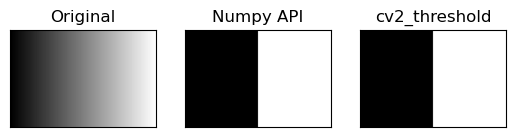

In [20]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./insightbook.opencv_project_python-master/img/gray_gradient.jpg',cv2.IMREAD_GRAYSCALE)

thresh_np = np.zeros_like(img)
thresh_np[img>127] = 255

ret,thresh_cv = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
print(ret)

imgs = {'Original':img,'Numpy API':thresh_np,'cv2_threshold':thresh_cv}
for i, (key,value) in enumerate(imgs.items()):
    plt.subplot(1,3,i+1)
    plt.title(key)
    plt.imshow(value,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
plt.show()

#### 오츠의 알고리즘(Otsu's Binarization Method)
- 최적의 임계치를 자동으로 발견

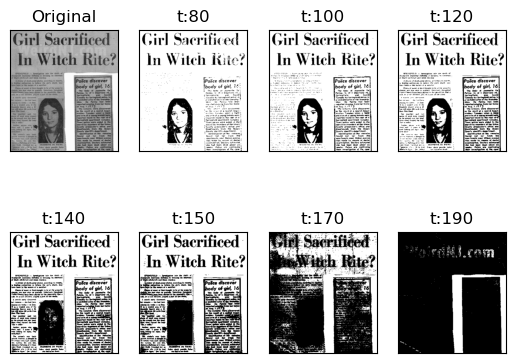

In [31]:
import cv2
import numpy as np
import matplotlib.pylab as plt
img = cv2.imread('./insightbook.opencv_project_python-master/img/scaned_paper.jpg',cv2.IMREAD_GRAYSCALE) #이미지를 그레이 스케일로 읽기
thresholds = [80, 100, 120, 140, 150, 170, 190]
imgs = {'Original' : img}
for t in thresholds:
    _, t_img = cv2.threshold(img, t, 255, cv2.THRESH_BINARY)
    imgs['t:%d'%t] = t_img
for i , (key, value) in enumerate(imgs.items()):
    plt.subplot(2, 4, i+1)
    plt.title(key)
    plt.imshow(value, cmap='gray')
    plt.xticks([]); plt.yticks([])
plt.show()

otsu threshold :  131.0


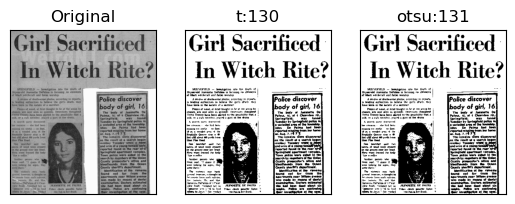

In [30]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img = cv2.imread('./insightbook.opencv_project_python-master/img/scaned_paper.jpg',cv2.IMREAD_GRAYSCALE)

_, t_130 = cv2.threshold(img,130,255,cv2.THRESH_BINARY)
t,t_otsu = cv2.threshold(img,-1,255,cv2.THRESH_BINARY | cv2.THRESH_OTSU)
print('otsu threshold : ',t)

img = {'Original':img,'t:130':t_130,'otsu:%d'%t:t_otsu}
for i,(key,value) in enumerate(imgs.items()):
    plt.subplot(1,3,i+1)
    plt.title(key)
    plt.imshow(value,cmap='gray')
    plt.xticks([])
    plt.yticks([])
    
plt.show()

#### 적응형 스레시홀드(Adaptive Threshold)
- 원본 영상에 조명이 일정하지 않거나 배경색이 여러 가지인 경우에는 아무리 여러번 겨예값을 바꾸며 시도해도 하나의 경계값을 이미지 전체에 적용해서는 좋은 결과를 얻지 못함
- 이미지를 여러 영역으로 나눈 다음 그 주변 픽셀 값만 가지고 계산을 해서 경계값을 구함 => 이를 적응형 스레시홀드라 함
- block_size = 홀수만 가능, 1보다는 큰 값
- c: 일반적으로는 양수의 값 사용

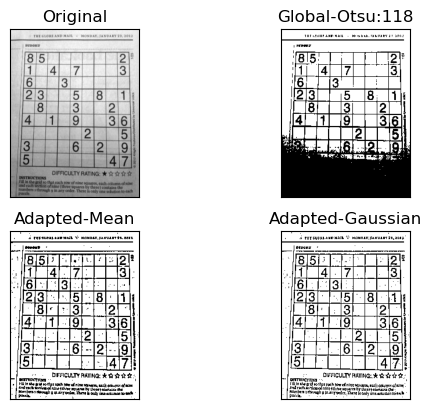

In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

blk_size = 9        # 블럭 사이즈
C = 5               # 차감 상수 
img = cv2.imread('./insightbook.opencv_project_python-master/img/sudoku.jpg', cv2.IMREAD_GRAYSCALE) # 그레이 스케일로  읽기

# ---① 오츠의 알고리즘으로 단일 경계 값을 전체 이미지에 적용
ret, th1 = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

# ---② 어뎁티드 쓰레시홀드를 평균과 가우시안 분포로 각각 적용
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
                                      cv2.THRESH_BINARY, blk_size, C)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, \
                                     cv2.THRESH_BINARY, blk_size, C)

# ---③ 결과를 Matplot으로 출력
imgs = {'Original': img, 'Global-Otsu:%d'%ret:th1, \
        'Adapted-Mean':th2, 'Adapted-Gaussian': th3}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2,i+1)
    plt.title(k)
    plt.imshow(v,'gray')
    plt.xticks([]),plt.yticks([])

plt.show()

- 경계 값을 전체 이미지에 적용하는 것을 전역적(global) 적용이라고 하는 반면, 이미지를 여러 구역으로 나누어 그 구역에 맞는 경계 값을 찾는 것을 지역적(local) 적용이라 함
- 대부분 이미지는 조명 차이와 그림자 때문에 지역적 적용이 필요함

### 4. 이미지 연산

In [33]:
import cv2
import numpy as np

# ---① 연산에 사용할 배열 생성
a = np.uint8([[200, 50]]) 
b = np.uint8([[100, 100]])

#---② NumPy 배열 직접 연산
add1 = a + b
sub1 = a - b
mult1 = a * 2
div1 = a / 3

# ---③ OpenCV API를 이용한 연산
add2 = cv2.add(a, b)
sub2 = cv2.subtract(a, b)
mult2 = cv2.multiply(a , 2)
div2 = cv2.divide(a, 3)

#---④ 각 연산 결과 출력
print(add1, add2)
print(sub1, sub2)
print(mult1, mult2)
print(div1, div2)

[[ 44 150]] [[255 150]]
[[100 206]] [[100   0]]
[[144 100]] [[255 100]]
[[66.66666667 16.66666667]] [[67 17]]


In [34]:
import cv2
import numpy as np

#---① 연산에 사용할 배열 생성
a = np.array([[1, 2]], dtype=np.uint8)
b = np.array([[10, 20]], dtype=np.uint8)
#---② 2번째 요소가 0인 마스크 배열 생성 
mask = np.array([[1, 0]], dtype=np.uint8)

#---③ 누적 할당과의 비교 연산
c1 = cv2.add( a, b , None, mask)
print(c1)
c2 = cv2.add( a, b , b.copy(), mask)
print(c2, b)

[[11  0]]
[[11 20]] [[10 20]]


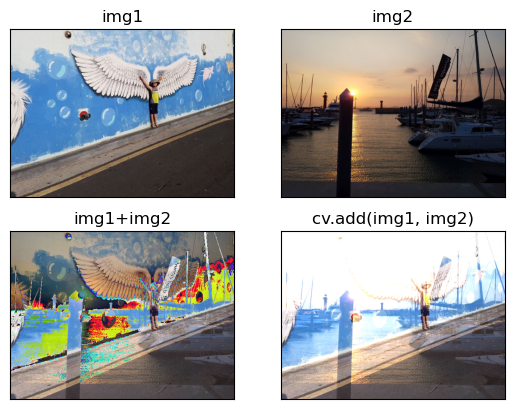

In [40]:
import cv2
import numpy as np
import matplotlib.pylab as plt

img1 = cv2.imread('./insightbook.opencv_project_python-master/img/wing_wall.jpg')
img2 = cv2.imread('./insightbook.opencv_project_python-master/img/yate.jpg')

img3 = img1 + img2 # 더하기 연산
img4 = cv2.add(img1, img2)  #OpenCV

img = {'img1':img1,'img2':img2,'img1+img2':img3,'cv.add(img1,img2)':img4}

for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,2, i + 1)
    plt.imshow(v[:,:,::-1])
    plt.title(k)
    plt.xticks([])
    plt.yticks([])
plt.show()

In [3]:
# 트랙바로 알파 블랜딩

import cv2
import numpy as np

win_name = 'Alpha blending'
trackbar_name = 'fade'

def onChange(x):
    alpha = x/100
    dst = cv2.addWeighted(img1, 1-alpha, img2, alpha, 0)
    cv2.imshow(win_name,dst)
    
img1 = cv2.imread('./insightbook.opencv_project_python-master/img/man_face.jpg')
img2 = cv2.imread('./insightbook.opencv_project_python-master/img/lion_face.jpg')

cv2.imshow(win_name,img1)
cv2.createTrackbar(trackbar_name,win_name, 0,100,onChange)

cv2.waitKey()
cv2.destroyAllWindows()

In [8]:
import numpy as np
import cv2
import matplotlib.pylab as plt


img = cv2.imread('./insightbook.opencv_project_python-master/img/girl.jpg')
mask = np.zeros_like(img)

cv2.circle(mask, (150,140), 100, (255,255,255), -1)
#cv2.circle(대상이미지, (원점x, 원점y), 반지름, (색상), 채우기)

masked = cv2.bitwise_and(img, mask)


cv2.imshow('original', img)
cv2.imshow('mask', mask)
cv2.imshow('masked', masked)
cv2.waitKey()
cv2.destroyAllWindows()

#### 차영상
- 영상에서 영상을 빼기 연산하면 두 영상의 차이(변화)를 알 수 있음
- 대충 틀린그림찾기 놀이와 비슷함
- 무턱대고 빼기 연산하면 음수가 나올 수 있으므로 절대값을 구해야 함(absdiff)

In [10]:
import numpy as np, cv2

#--① 연산에 필요한 영상을 읽고 그레이스케일로 변환
img1 = cv2.imread('./insightbook.opencv_project_python-master/img/robot_arm1.jpg')
img2 = cv2.imread('./insightbook.opencv_project_python-master/img/robot_arm2.jpg')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

#--② 두 영상의 절대값 차 연산
diff = cv2.absdiff(img1_gray, img2_gray)

#--③ 차 영상을 극대화 하기 위해 쓰레시홀드 처리 및 컬러로 변환
_, diff = cv2.threshold(diff, 1, 255, cv2.THRESH_BINARY)
diff_red = cv2.cvtColor(diff, cv2.COLOR_GRAY2BGR)
diff_red[:,:,2] = 0

#--④ 두 번째 이미지에 변화 부분 표시
spot = cv2.bitwise_xor(img2, diff_red)

#--⑤ 결과 영상 출력
cv2.imshow('img1', img1)
cv2.imshow('img2', img2)
cv2.imshow('diff', diff)
cv2.imshow('spot', spot)
cv2.waitKey()
cv2.destroyAllWindows()

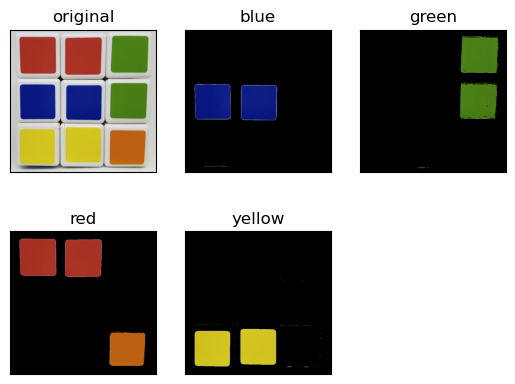

In [2]:
import cv2
import numpy as np
import matplotlib.pylab as plt

#--① 큐브 영상 읽어서 HSV로 변환
img = cv2.imread("./insightbook.opencv_project_python-master/img/cube.jpg")
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#--② 색상별 영역 지정
blue1 = np.array([90, 50, 50])
blue2 = np.array([120, 255,255])
green1 = np.array([45, 50,50])
green2 = np.array([75, 255,255])
red1 = np.array([0, 50,50])
red2 = np.array([15, 255,255])
red3 = np.array([165, 50,50])
red4 = np.array([180, 255,255])
yellow1 = np.array([20, 50,50])
yellow2 = np.array([35, 255,255])
# --③ 색상에 따른 마스크 생성
mask_blue = cv2.inRange(hsv, blue1, blue2)
mask_green = cv2.inRange(hsv, green1, green2)
mask_red = cv2.inRange(hsv, red1, red2)
mask_red2 = cv2.inRange(hsv, red3, red4)
mask_yellow = cv2.inRange(hsv, yellow1, yellow2)
#--④ 색상별 마스크로 색상만 추출
res_blue = cv2.bitwise_and(img, img, mask=mask_blue)
res_green = cv2.bitwise_and(img, img, mask=mask_green)
res_red1 = cv2.bitwise_and(img, img, mask=mask_red)
res_red2 = cv2.bitwise_and(img, img, mask=mask_red2)
res_red = cv2.bitwise_or(res_red1, res_red2)
res_yellow = cv2.bitwise_and(img, img, mask=mask_yellow)
#--⑤ 결과 출력
imgs = {'original': img, 'blue':res_blue, 'green':res_green,
                            'red':res_red, 'yellow':res_yellow}
for i, (k, v) in enumerate(imgs.items()):
    plt.subplot(2,3, i+1)
    plt.title(k)
    plt.imshow(v[:,:,::-1])
    plt.xticks([]); plt.yticks([])
plt.show()